In [1]:
import pandas as pd
import numpy as np

In [3]:
path = "experiments/exp_set_01_2025-07-31_22-33-36/results_report.csv"

In [4]:
data = pd.read_csv(path)

In [5]:
data

,Iteration,Experiment,Time,Objective,Columns,Difference,RMP_time,Graph_time,SPFA_time,Label_time,Filter_time,Iteration_time
0,1,exp_1_zmin_50_k_30_i_9_True,2025-07-31 22:46:00,49324.98,63,0.00,0.0764,0.0100,9.4559,0.0005,0.0020,9.5478
1,2,exp_1_zmin_50_k_30_i_9_True,2025-07-31 22:46:00,48536.43,74,788.54,0.0878,0.0087,9.0589,0.0010,0.0020,9.1618
2,3,exp_1_zmin_50_k_30_i_9_True,2025-07-31 22:46:00,48361.33,91,175.10,0.0922,0.0094,19.6963,0.0010,0.0020,19.8036
3,4,exp_1_zmin_50_k_30_i_9_True,2025-07-31 22:46:00,48053.17,103,308.16,0.0955,0.0080,11.3740,0.0010,0.0010,11.4826
4,5,exp_1_zmin_50_k_30_i_9_True,2025-07-31 22:46:00,47776.69,111,276.48,0.0985,0.0080,8.1888,0.0005,0.0011,8.2999
...,...,...,...,...,...,...,...,...,...,...,...,...
607,47,exp_12_zmin_50_k_100_i_9_False,2025-08-01 00:53:38,34897.60,581,3.62,0.3223,0.0080,17.3152,0.0133,0.0010,17.6690
608,48,exp_12_zmin_50_k_100_i_9_False,2025-08-01 00:53:38,34894.48,587,3.12,0.3658,0.0084,19.5825,0.0159,0.0000,19.9838
609,49,exp_12_zmin_50_k_100_i_9_False,2025-08-01 00:53:38,34892.85,591,1.63,0.3507,0.0082,14.5934,0.0000,0.0000,14.9623
610,50,exp_12_zmin_50_k_100_i_9_False,2025-08-01 00:53:38,34890.97,595,1.88,0.3888,0.0080,14.4654,0.0000,0.0000,14.8711


In [11]:
data.groupby("Experiment")["Objective"].min()

Experiment
exp_10_zmin_50_k_100_i_9_False    34890.68
exp_11_zmin_50_k_100_i_9_False    34890.68
exp_12_zmin_50_k_100_i_9_False    34890.68
exp_1_zmin_50_k_30_i_9_True       34890.68
exp_2_zmin_50_k_30_i_9_True       34890.68
exp_3_zmin_50_k_30_i_9_True       34890.68
exp_4_zmin_50_k_30_i_9_False      34890.68
exp_5_zmin_50_k_30_i_9_False      34890.68
exp_6_zmin_50_k_30_i_9_False      34890.68
exp_7_zmin_50_k_100_i_9_True      34890.68
exp_8_zmin_50_k_100_i_9_True      34890.68
exp_9_zmin_50_k_100_i_9_True      34890.68
Name: Objective, dtype: float64

In [40]:
import numpy as np
n, p = 1, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 212)

In [41]:
sum(s)

np.int32(103)

In [2]:
timetables_a = pd.read_csv('initializer/files/timetables_A.csv')
timetables_b = pd.read_csv('initializer/files/timetables_A.csv')

Loading timetable from: initializer/files/timetables_B.csv
Loading timetable from: initializer/files/timetables_C.csv

Generating plot for trip distribution...


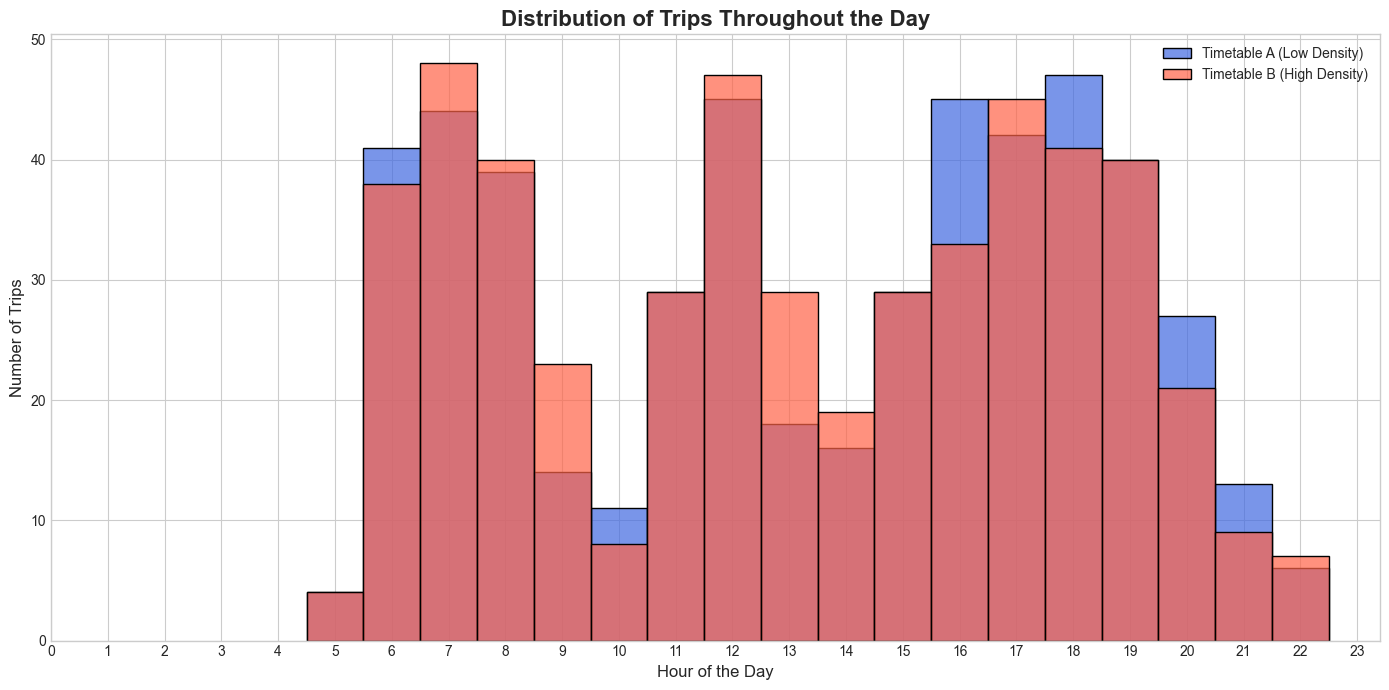

Done.

Calculating intervals and generating plot...


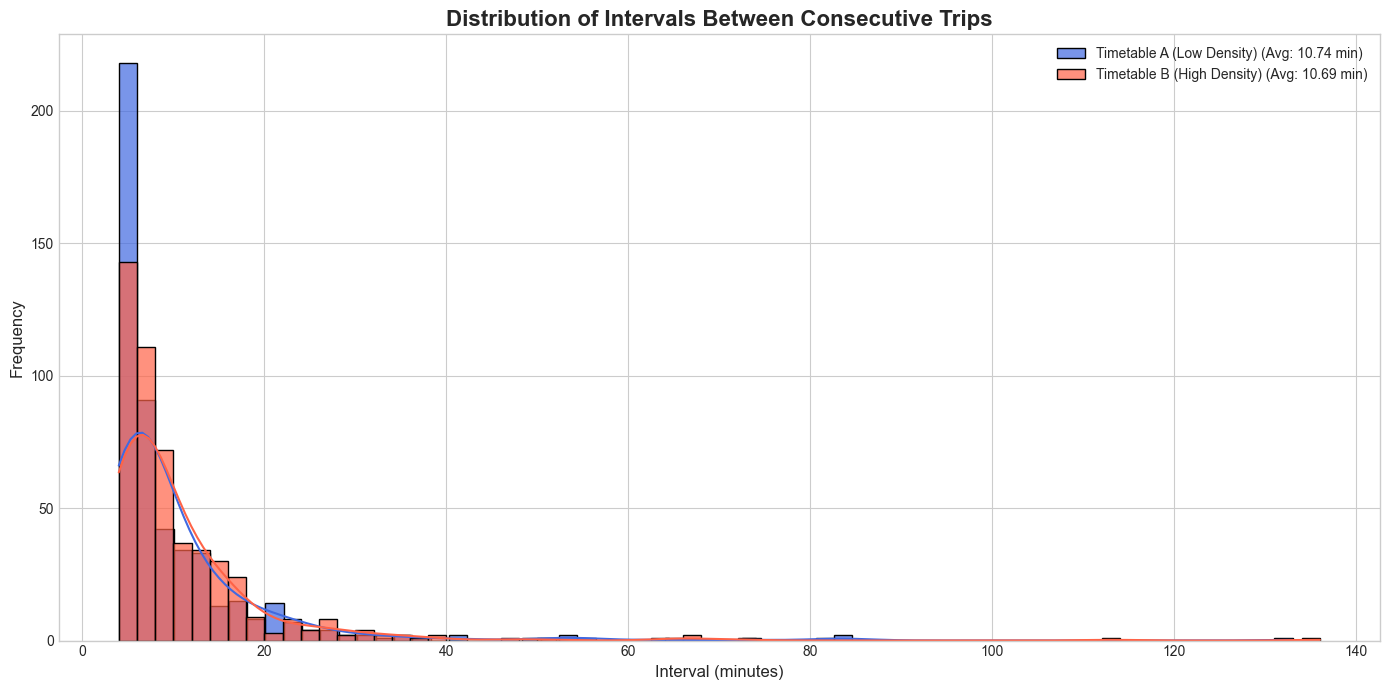

Done.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_timetable(filepath: str) -> pd.DataFrame:
    """
    Loads a timetable CSV file and ensures departure_time is a datetime object.

    Args:
        filepath: The path to the timetable CSV file.

    Returns:
        A pandas DataFrame with the loaded timetable data.
    """
    if not os.path.exists(filepath):
        print(f"Error: File not found at {filepath}")
        return pd.DataFrame()
    
    print(f"Loading timetable from: {filepath}")
    df = pd.read_csv(filepath, parse_dates=['departure_time'])
    return df

def plot_trip_distribution(df_a: pd.DataFrame, df_b: pd.DataFrame, name_a: str, name_b: str):
    """
    Plots the distribution of trips throughout the day for two timetables.

    Args:
        df_a: DataFrame for the first timetable.
        df_b: DataFrame for the second timetable.
        name_a: Name for the first timetable (for legend).
        name_b: Name for the second timetable (for legend).
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(14, 7))
    
    # Extract hour from departure_time
    df_a['hour'] = df_a['departure_time'].dt.hour
    df_b['hour'] = df_b['departure_time'].dt.hour
    
    sns.histplot(df_a['hour'], bins=range(25), kde=False, color='royalblue', label=name_a, stat='count', alpha=0.7, discrete=True)
    sns.histplot(df_b['hour'], bins=range(25), kde=False, color='tomato', label=name_b, stat='count', alpha=0.7, discrete=True)
    
    plt.title('Distribution of Trips Throughout the Day', fontsize=16, fontweight='bold')
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Number of Trips', fontsize=12)
    plt.xticks(range(24))
    plt.legend()
    plt.tight_layout()
    plt.show()

def calculate_intervals(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the departure intervals in minutes for each line and start_cp.
    It sorts the trips and then calculates the time difference between consecutive trips.

    Args:
        df: The timetable DataFrame.

    Returns:
        A pandas Series containing the calculated intervals in minutes.
    """
    if df.empty:
        return pd.Series(dtype='float64')
        
    # Sort values to ensure correct interval calculation
    df_sorted = df.sort_values(by=['line', 'start_cp_id', 'departure_time'])
    
    # Calculate the difference in departure times within each group
    intervals = df_sorted.groupby(['line', 'start_cp_id'])['departure_time'].diff()
    
    # Convert timedelta to minutes and drop NA values from the first trip of each group
    return intervals.dt.total_seconds().div(60).dropna()

def plot_interval_distribution(intervals_a: pd.Series, intervals_b: pd.Series, name_a: str, name_b: str):
    """
    Plots the distribution of intervals between trips for two timetables.

    Args:
        intervals_a: Series of intervals for the first timetable.
        intervals_b: Series of intervals for the second timetable.
        name_a: Name for the first timetable (for legend).
        name_b: Name for the second timetable (for legend).
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(14, 7))
    
    sns.histplot(intervals_a, kde=True, color='royalblue', label=f"{name_a} (Avg: {intervals_a.mean():.2f} min)", binwidth=2, alpha=0.7)
    sns.histplot(intervals_b, kde=True, color='tomato', label=f"{name_b} (Avg: {intervals_b.mean():.2f} min)", binwidth=2, alpha=0.7)
    
    plt.title('Distribution of Intervals Between Consecutive Trips', fontsize=16, fontweight='bold')
    plt.xlabel('Interval (minutes)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    """
    Main function to load data and generate comparison plots.
    """
    # --- Configuration ---
    # Using two instance files found in the project context for demonstration.
    # Timetable A is a lower-density schedule.
    # Timetable B is a higher-density schedule.
    filepath_a = "initializer/files/timetables_B.csv"
    filepath_b = "initializer/files/timetables_C.csv"
    
    name_a = "Timetable A (Low Density)"
    name_b = "Timetable B (High Density)"

    # --- Load Data ---
    df_a = load_timetable(filepath_a)
    df_b = load_timetable(filepath_b)

    if df_a.empty or df_b.empty:
        print("Could not load one or both timetables. Exiting.")
        return

    # --- Comparison 1: Trip Distribution ---
    print("\nGenerating plot for trip distribution...")
    plot_trip_distribution(df_a, df_b, name_a, name_b)
    print("Done.")

    # --- Comparison 2: Interval Distribution ---
    print("\nCalculating intervals and generating plot...")
    intervals_a = calculate_intervals(df_a)
    intervals_b = calculate_intervals(df_b)
    plot_interval_distribution(intervals_a, intervals_b, name_a, name_b)
    print("Done.")


if __name__ == "__main__":
    # This script assumes it's run from the root directory of the project (MD-EVSP).
    main()

